In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#read data into dataframe
data=pd.read_csv(r"C:\Datasets\ML\Advertising.csv",index_col=0,header=0) #r=raw string ,if no r then give \\ or / in path
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [3]:
print(data.dtypes)
print(data.info())
print(data.shape)
print(data.describe())

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object
<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB
None
(200, 4)
               TV       radio   newspaper       sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   14.022500
std     85.854236   14.846809   21.778621    5.217457
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   10.375000
50%    149.750000   22.900000   25.750000   12.900000
75%    218.825000   36.525000   45.100000   17.400000
max    296.400000   49.600000  114.000000   27.000000


In [4]:
data.isnull().sum() #there are no missing values in this data, 
#There is no need of feature selection at this level given that all the variables are relevant to the problem statement.

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

<Axes: >

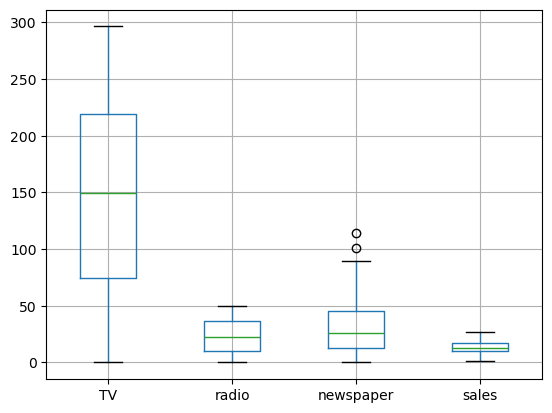

In [5]:
data.boxplot()

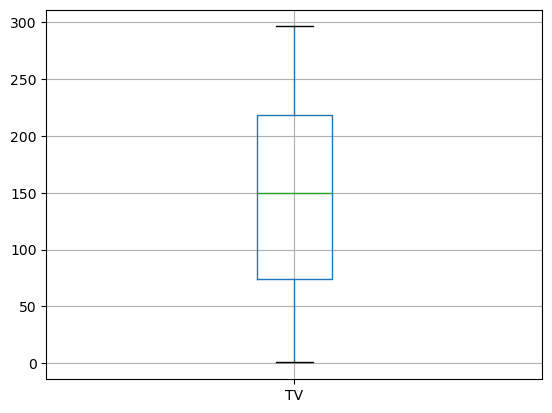

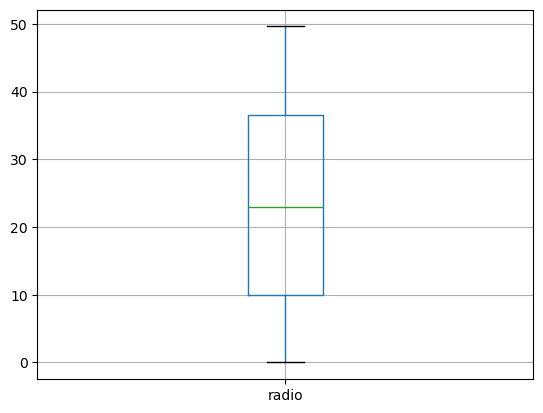

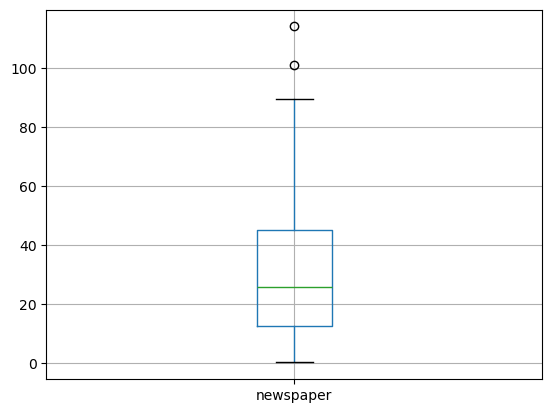

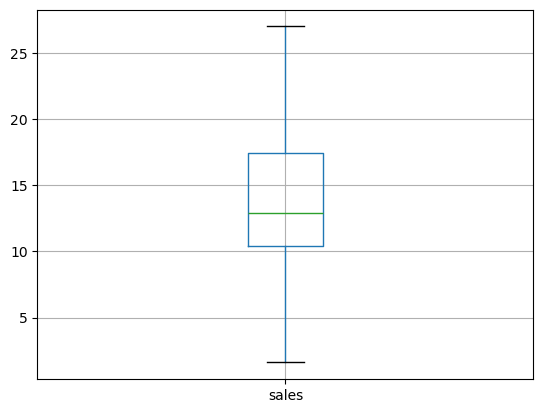

In [6]:
#Assumption 1: There should be no outliers in the data
#Check using boxplots
#writing code to create boxplots for single column as above it was not that clear so individual coln se we are plotting the boxplot
for i in data.columns:
    data.boxplot(column=i)
    plt.show()

In [7]:
#data.drop(data[data['newspaper']>=90].index,axis=0,inplace=True) #90 client specified value and delete the rows so index
#We can delete the rows from newspaper var and proceed
#data[data['newspaper']>=90].index only these index values will be dropped

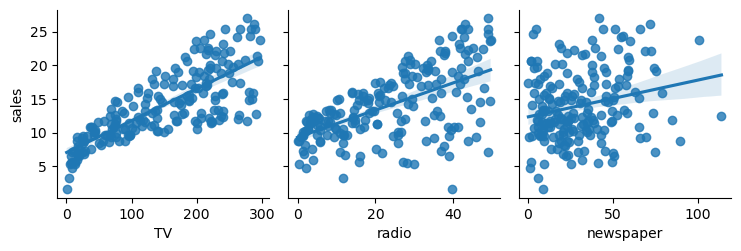

In [8]:
#Assumption 2: Assumption of linearity: Every ind var should hv a linear relationship with the dep var
sns.pairplot(data,x_vars=['TV','radio','newspaper'],
            y_vars=['sales'],kind='reg')
plt.show()

In [9]:
#We can drop those variables which do not show a linear relationship with the y variable this could help us with feature selection 
#helping in feature selection as newspaper has no relation so only tv and radio will go
#data.drop(['newspaper'],axis=1,inplace=True)

In [10]:
data.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [11]:
#Create X and Y
X=data.loc[:,['TV','radio','newspaper']]
Y=data.loc[:,'sales']

#X=data.iloc[:,0:-1]
#Y=data.iloc[:,-1]

#X=data.drop(['sales'],axis=1)
#Y=data['sales']

In [12]:
print(X.shape)
print(Y.shape)

(200, 3)
(200,)


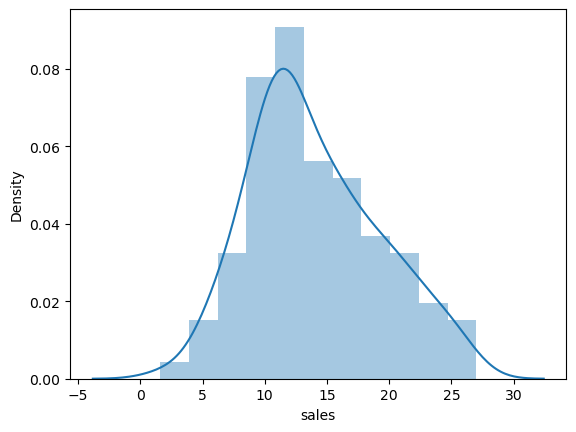

In [13]:
#Assumption of Normality: The dependent variable should follow an Approximate normal distribution
sns.distplot(Y)
plt.show()
#sns.displot(Y,kde=True) kde=kernel distribution

In [14]:
#If the Y variable is skewed and does not follow the normal distribution we can log transform the y variable to reduce the skewness
#and this variable to build the model.
#The model in that case would predict log transformed y values which we will have to convert back to original scale(antilog) using the np.exp()
'''
# Log Transformation
import numpy as np
Y_log=np.log(Y)''' 
#Unnecessary log trans is not required as it will skew the data purposely .

'\n# Log Transformation\nimport numpy as np\nY_log=np.log(Y)'

In [15]:
#sns.distplot(Y_log)
#plt.show()

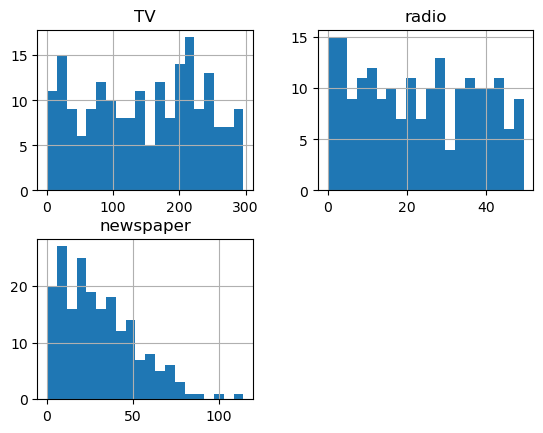

In [16]:
X.hist(bins=20) #20 bars
plt.show()

In [17]:
#Generic Code
#Lesser the skewness better the model
from scipy.stats import skew
#finding the skewness in each variable
data_num_skew = X.apply(lambda i: skew(i.dropna())) #finding missing values and skew it and store in var
#subsetting the variables that are highly skewed
data_num_skewed = data_num_skew[(data_num_skew > .75) | (data_num_skew < -.75)]
 
print(data_num_skew)
print(data_num_skewed)
import numpy as np
# apply log + 1 transformation for all numeric features with skewness over .75
X[data_num_skewed.index] = np.log1p(X[data_num_skewed.index])
#(In order to avoid errors we use log1,if we hv value as 0 then log 0 value is -inf so gives error ) 
#For transforming variables having 0 as a value avoid using log as it will return inf values which will throw an error when used in calculations 
#in such situations we can use log+1 transformations to avoid getting infinite values
#X["newspaper"] = np.log1p(X["newspaper"])

TV          -0.069328
radio        0.093467
newspaper    0.887996
dtype: float64
newspaper    0.887996
dtype: float64


                 TV     radio  newspaper
TV         1.000000  0.054809   0.030951
radio      0.054809  1.000000   0.251909
newspaper  0.030951  0.251909   1.000000


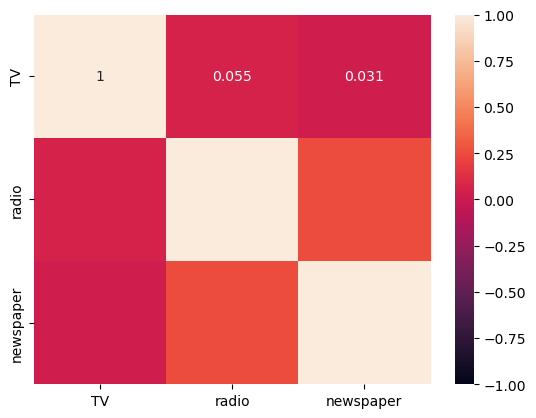

In [18]:
#Assumtion of multicollinearity: There should be no multicollinearity between the independent variables
#multicollinearity is the relationship amongst the multiple ind variables
corr_df=X.corr(method='pearson')
print(corr_df)

sns.heatmap(corr_df,vmax=1.0,vmin=-1.0,annot=True)
plt.show()

In [19]:
#Generic Code
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
 
vif_df = pd.DataFrame()
vif_df["features"] = X.columns
vif_df["VIF Factor"] = [vif(X.values, i) for i in range(X.shape[1])] 
vif_df.round(2)

,features,VIF Factor
0,TV,3.39
1,radio,3.63
2,newspaper,5.44


In [20]:
#X.drop('newspaper',axis=1,inplace=True) As newspaper is an problematic variable we will drop it
#rerun the VIF code

In [21]:
#to downgrade the version
#pip install seaborn==0.9.0

In [22]:
from sklearn.model_selection import train_test_split

#Split the data into test and train
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=10) #random_state= like seed it will fix the values 

In [23]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)
#print('Percentage of train data',X_train.shape[0]/X.shape[0]*100)

(160, 3)
(160,)
(40, 3)
(40,)


In [24]:
from sklearn.linear_model import LinearRegression
#create a model object
lm=LinearRegression()

#train the model object
lm.fit(X_train,Y_train) #fit into the model, which will learn on the training data

#print the intercept and coefficients
print(lm.intercept_)  #Beta 0
print(lm.coef_) #Slope i.e Beta 1,2,3

3.3532913858151545
[ 0.0437425   0.19303708 -0.04895137]


In [25]:
#pair the feature names with the coefficients
print(list(zip(X.columns,lm.coef_)))

[('TV', 0.04374250157742164), ('radio', 0.19303707897345296), ('newspaper', -0.04895136822248787)]


In [26]:
#Manually testing
X1=100
X2=100
X3=np.log1p(100) #We had log transformed newspaper var so we will log transform now also. 
Y_pred=3.3532913858151545+(0.0437425*X1)+(0.193037078*X2)+(-0.04895137*X3)
print(Y_pred)

26.805332713800667


In [27]:
X1=100
X2=200
X3=np.log1p(0) #Keeping it 0 becoz its leading to loss and investing in radio i.e X2. 
Y_pred=3.3532913858151545+(0.0437425*X1)+(0.193037078*X2)+(-0.04895137*X3)
print(Y_pred)

46.334956985815154


In [28]:
#predict using the model
Y_pred=lm.predict(X_test) #Passing only X_test as Y_test we want to find
print(Y_pred)

[18.15026866 12.96136899 18.05815332 23.66025079 20.68751041 14.26325872
 14.92774472 21.38847375 21.14752911 12.75788534 23.99735583  7.20632737
 12.30777109 19.22813333 19.41581583 13.44985803 19.62619644  9.24667496
 21.1052867  20.87838433 15.52611251 10.91695579 22.82910679 15.82915597
 17.40742204  8.17170435 11.88738387 12.69866637 21.71275044  7.94920205
 12.49118989 20.43292079  4.71443086  4.72126238 16.7504848  15.74384945
  6.74775596 17.73750244  9.01170001 13.60841593]


In [29]:
new_df=pd.DataFrame()
new_df=X_test.copy()
 
new_df["Actual sales"]=Y_test
new_df["Predicted sales"]=Y_pred
new_df=new_df.reset_index().drop("index", axis=1) # it was giving randomly the data so reset index is used,
#dropping index bcoz it will create a new coln for it in the data if not dropped

In [30]:
new_df

,TV,radio,newspaper,Actual sales,Predicted sales
0,210.7,29.5,2.332144,18.4,18.150269
1,8.7,48.9,4.330733,7.2,12.961369
2,218.4,27.7,3.996364,18.0,18.058153
3,283.6,42.0,4.207673,25.5,23.660251
4,216.4,41.7,3.703768,22.6,20.687510
5,147.3,23.9,3.000720,14.6,14.263259
6,188.4,18.1,3.280911,14.9,14.927745
7,198.9,49.4,4.110874,23.7,21.388474
8,216.8,43.9,3.339322,22.3,21.147529
9,17.2,45.9,4.252772,9.3,12.757885


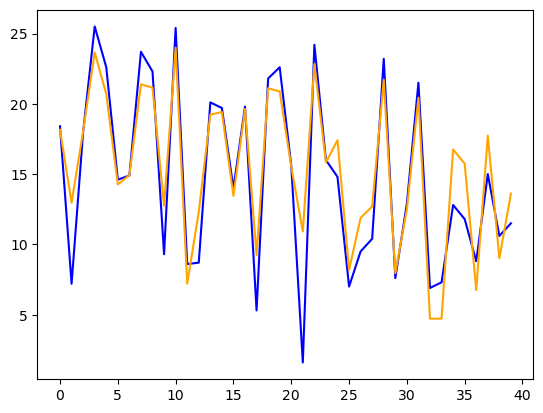

In [31]:
new_df["Actual sales"].plot(color="blue")
new_df["Predicted sales"].plot(color="orange")
plt.show()
#It is seen that 12ke upar and 25ke niche ke values ke liye its predicting good 

In [32]:
lm.score(X_train, Y_train) #Score is good but it is on training data
#Y_pred=lm.predict(X_train)
#score=r2_score(Y_train,Y_pred)

0.920898664750022

In [33]:
#Generic Code
#Evaluating the model
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
 
r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)
 
rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)
 
adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.8348010719035319
RMSE: 2.5929769110930603
Adj R-square: 0.8322725168816472


In [34]:
print(Y_test.min())
print(Y_test.max())

1.6
25.5


RMSE value is 2.5 and min (1.6) is closer to it so it is a good model.

In [35]:
#Logical conclusion not needed here but this is how it is done
new_df["Residual"]=new_df["Actual sales"]-new_df["Predicted sales"]
new_df.to_excel("Sales Prediction.xlsx",header=True,index=True)
new_df.head()

,TV,radio,newspaper,Actual sales,Predicted sales,Residual
0,210.7,29.5,2.332144,18.4,18.150269,0.249731
1,8.7,48.9,4.330733,7.2,12.961369,-5.761369
2,218.4,27.7,3.996364,18.0,18.058153,-0.058153
3,283.6,42.0,4.207673,25.5,23.660251,1.839749
4,216.4,41.7,3.703768,22.6,20.687510,1.912490


In [36]:
#Tuning: Ridge
from sklearn.linear_model import Ridge
rid=Ridge()
rid.fit(X_train,Y_train)

"""Previous values:
3.3532913858151545
[ 0.0437425   0.19303708 -0.04895137]
"""
#print intercept and coefficients
print(rid.intercept_)  #Beta 0
print(rid.coef_)

3.3522471725965985
[ 0.04374234  0.19302603 -0.04853131]


In [37]:
Y_pred=rid.predict(X_test)

In [38]:
#Generic Code
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
 
r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)
 
rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)
 
adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

"""
Previous values:
R-squared: 0.8348010719035319
RMSE: 2.5929769110930603
Adj R-square: 0.8322725168816472
"""


R-squared: 0.8348082644975935
RMSE: 2.5929204626839977
Adj R-square: 0.8322798195664342


'\nPrevious values:\nR-squared: 0.8348010719035319\nRMSE: 2.5929769110930603\nAdj R-square: 0.8322725168816472\n'

In [39]:
from sklearn.linear_model import Lasso
las=Lasso()
las.fit(X_train,Y_train)

"""Previous values:
3.3532913858151545
[ 0.0437425   0.19303708 -0.04895137]
"""
#print intercept and coefficients
print(las.intercept_)  #Beta 0
print(las.coef_)

3.336794058220317
[ 0.04362374  0.18766033 -0.        ]


In [40]:
Y_pred=las.predict(X_test)

from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
 
r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)
 
rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)
 
adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.8360506658527163
RMSE: 2.5831514271094234
Adj R-square: 0.8335412372688292


In [41]:
from sklearn.linear_model import ElasticNet
en=ElasticNet(l1_ratio=0.5) #50% like Lasso, 50% like Ridge ,bydefault l1_ratio is 0.8
en.fit(X_train,Y_train)

#print intercept and coefficients
print(en.intercept_)  #Beta 0
print(en.coef_)

3.286744514338503
[ 0.04367408  0.1895869  -0.        ]


In [42]:
Y_pred=en.predict(X_test)

from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
 
r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)
 
rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)
 
adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.8358845632451918
RMSE: 2.5844596348220477
Adj R-square: 0.8333725922744549


In [43]:
#OLS-->OLS(Y_train, X_train)
#ols-->ols(Y~X1+X2+X3)

In [44]:
new_df=pd.DataFrame()
new_df=X_train.copy()
 
new_df["sales"]=Y_train.copy()
new_df.shape

(160, 4)

In [45]:
import statsmodels.formula.api as sm
 
# create a fitted model with all three features
lm_model = sm.ols(formula='sales ~ TV + radio + newspaper', 
                  data=new_df).fit()
 
# print the coefficients
print(lm_model.params) #Parameters
print(lm_model.summary()) #Summary of lm model

Intercept    3.353291
TV           0.043743
radio        0.193037
newspaper   -0.048951
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     605.4
Date:                Tue, 06 Aug 2024   Prob (F-statistic):           1.10e-85
Time:                        10:46:23   Log-Likelihood:                -276.63
No. Observations:                 160   AIC:                             561.3
Df Residuals:                     156   BIC:                             573.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

In [46]:
Y_pred=lm_model.predict(X_test)

In [47]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
 
r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)
 
rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)
 
adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.8348010719035376
RMSE: 2.5929769110930163
Adj R-square: 0.8322725168816529


In [48]:
import statsmodels.formula.api as sm
 
# create a fitted model with all three features
lm_model = sm.ols(formula='sales ~ TV + radio', 
                  data=new_df).fit()
 
# print the coefficients
print(lm_model.params) #Parameters
print(lm_model.summary())

Intercept    3.217026
TV           0.043721
radio        0.192425
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     912.9
Date:                Tue, 06 Aug 2024   Prob (F-statistic):           3.47e-87
Time:                        10:46:24   Log-Likelihood:                -276.70
No. Observations:                 160   AIC:                             559.4
Df Residuals:                     157   BIC:                             568.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------

In [49]:
Y_pred=lm_model.predict(X_test)

from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
 
r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)
 
rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)
 
adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.8354496662944217
RMSE: 2.5878817077378105
Adj R-square: 0.8329310387377037


#### Post Model building Assumption

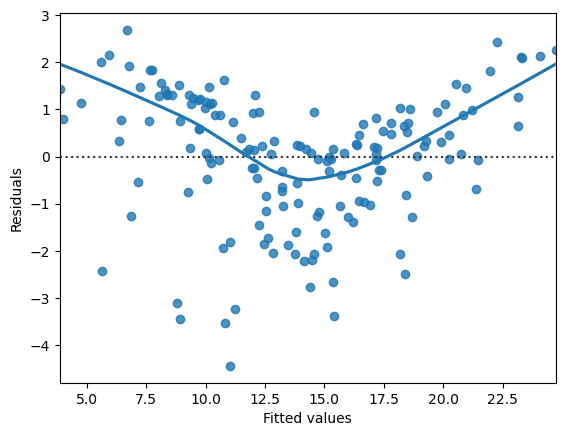

In [50]:
# Assumtion 5:no auto correlation
#Assumption 6: Errors should be random
#checked using Residual v/s Fitted plot
model_fitted_y = lm_model.fittedvalues
sns.residplot(x=model_fitted_y, y='sales', data=new_df, lowess=True)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()

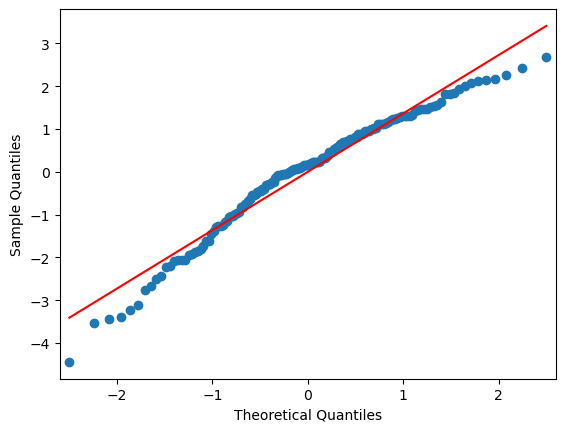

In [51]:
#Assumption 7: Errors should follow a approximate normal distribution
#checked using Normal QQ (Quantile-Quantile) plot
import statsmodels.api as sma
sma.qqplot(lm_model.resid, line='s')
plt.show()

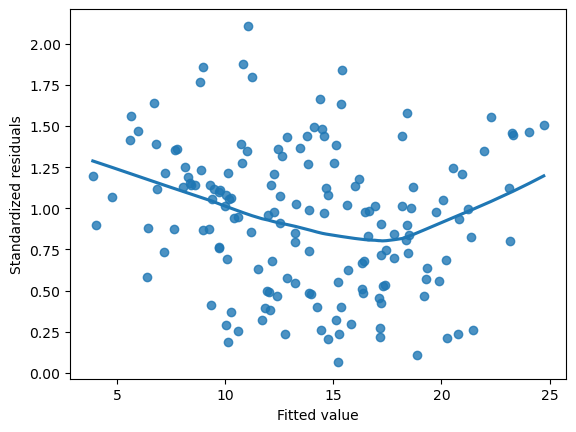

In [53]:
#Assumption 8: Errors should follow a constant variance-->Homoskedasticity
#checked using Scale location plot
model_norm_residuals_abs_sqrt=np.sqrt(np.abs(lm_model.resid))
 
sns.regplot(x=lm_model.fittedvalues,
            y=model_norm_residuals_abs_sqrt,
              scatter=True, lowess=True)        
plt.ylabel("Standardized residuals")
plt.xlabel("Fitted value")
plt.show()